# This Super Store dataset which is imported from www.superdatascience.com where we are predicting the Region of the Super Store using Revenue.

### We will start using importing Python packages and dataset

In [28]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn import neighbors, datasets

#iris = datasets.load_wine()
sales=pd.read_csv("/Users/saurabhkarambalkar/Desktop/MLHW/db/salesdata.csv",parse_dates=True)
sales.head()

,Region,MarketingSpend,Revenue
0,Region 2,2601,48610
1,Region 2,2727,45689
2,Region 2,2768,49554
3,Region 2,2759,38284
4,Region 2,2869,59887


### Now we will split our dataset in traing and testing data sets

In [48]:
from sklearn.cross_validation import train_test_split

# We will create matrix X and target vector y as follows
X = np.array(sales.ix[:,1:3]) 	# end index is exclusive
y = np.array(sales['Region']) 	# indexing

# Spliting our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



### Now we will load K nearest neighbor classifier libraries for Python

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the data model
knn.fit(X_train, y_train)

# predicting the response
pred = knn.predict(X_test)

# evaluating accuracy of dataset
print (accuracy_score(y_test, pred))

0.5


### Now we will start the Cross Validation Process to validate our results

In [50]:
from sklearn.cross_validation import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [51]:
cv_scores

[0.54656565656565648,
 0.51010101010101017,
 0.481010101010101,
 0.43333333333333329,
 0.39747474747474748,
 0.41262626262626262,
 0.44464646464646462,
 0.38202020202020204,
 0.38090909090909097,
 0.4022222222222222,
 0.36111111111111116,
 0.41404040404040404,
 0.40313131313131317,
 0.40131313131313134,
 0.39909090909090911]

In [53]:
cv_scores
MSE = [1 - x for x in cv_scores]
MSE
#MSE.index(min(MSE))
#MSE.index(min(MSE))
#neighbors[3]

[0.45343434343434352,
 0.48989898989898983,
 0.518989898989899,
 0.56666666666666665,
 0.60252525252525246,
 0.58737373737373733,
 0.55535353535353538,
 0.61797979797979796,
 0.61909090909090903,
 0.59777777777777774,
 0.63888888888888884,
 0.58595959595959601,
 0.59686868686868677,
 0.59868686868686871,
 0.60090909090909084]

### Now we will plot the Cross Validation K Fold using MATPLOTLIB in Python

The optimal number of neighbors is : 1


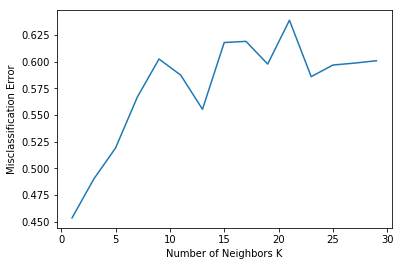

In [55]:
import matplotlib.pyplot as plt

#Calculating MSE
MSE = [1 - x for x in cv_scores]

# deciding best k
optimal_k = neighbors[MSE.index(min(MSE))]

print ("The optimal number of neighbors is :",optimal_k)

# Now we will plot the misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Now we will perform some functions as follows
### Training Function

In [40]:
def train(X_train, y_train):
	# do nothing 
	return

### Predicting Function

In [41]:
def predict(X_train, y_train, x_test, k):
	# creating the list for distances and targets
	distances = []
	targets = []

	for i in range(len(X_train)):
		# now first we will compute the euclidean distance
		distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
		# adding it to list of distances
		distances.append([distance, i])

	# sorting the list
	distances = sorted(distances)

	# making a list of the k neighbors' targets
	for i in range(k):
		index = distances[i][1]
		targets.append(y_train[index])

	# return most common target
	return Counter(targets).most_common(1)[0][0]


### K Nearest Neighbor Function

In [45]:
from collections import Counter
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
	# train on the input data
	train(X_train, y_train)

	# loop over all observations
	for i in range(len(X_test)):
		predictions.append(predict(X_train, y_train, X_test[i, :], k))
        
 

### Prediction Function

In [ ]:
# making our predictions 
predictions = []

kNearestNeighbor(X_train, y_train, X_test, predictions, 3)

# transform the list into an array
predictions = np.asarray(predictions)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print(accuracy*100)

### Citations :-
#### https://www.superdatascience.com/tableau/
#### http://scikit-learn.org/stable/
#### https://github.com/scikit-learn/scikit-learn